# Importing Necessary libraries

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter

### Merging all the 12 months data in one CSV file

In [18]:
files=[file for file in os.listdir('D:/SalesAnalysis/Sales_Data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('D:/SalesAnalysis/Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv", index=False)
all_months_data.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Reading The Updated Data

In [23]:
all_data=pd.read_csv("C:/Users/admin/all_data.csv")
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cleaning Up Data

###### Drop ROWS of NAN's

In [52]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head(5)
all_data=all_data.dropna(how='all')
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


###### Find "Or" and Delete it

In [64]:
all_data=all_data[all_data["Order Date"].str[0:2]!="Or"]
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


##### Converting Columns to the correct type

In [74]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) #make float
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4


### Task 2: Adding "Month" Data Column

In [66]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a Sales Column

In [76]:
all_data['Sales']=all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Add a City Column

In [210]:
# Let's use .apply() function
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]
    
all_data['City']=all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Q1. What was the best month for sales and how much was earned that month?

In [306]:
results=all_data.groupby('Month').sum('Sales')

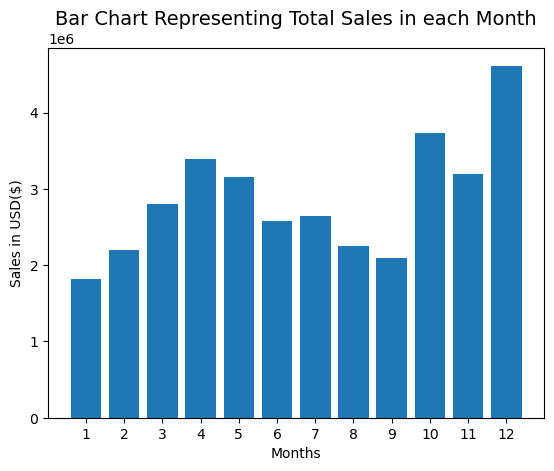

In [324]:
Months=range(1,13)
plt.bar(Months, results['Sales'])
plt.xticks(Months)
plt.title("Bar Chart Representing Total Sales in each Month", size=14)
plt.ylabel("Sales in USD($)")
plt.xlabel("Months")
plt.show()



#### Q2: Which City had the highest number of sales

In [220]:
results=all_data.groupby("City").sum('Sales')
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


[]

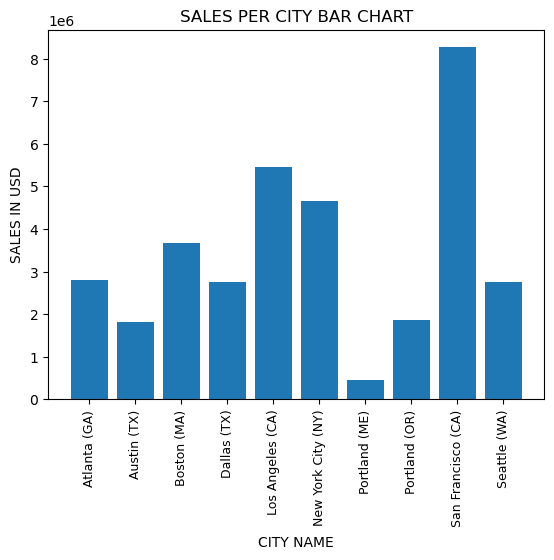

In [256]:
cities=[city for city, df in all_data.groupby("City")]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation="vertical", size=9)
plt.title("SALES PER CITY BAR CHART")
plt.xlabel('CITY NAME')
plt.ylabel('SALES IN USD')
plt.plot()

# San Francisco (CA) had the highest number of sales

#### Q3: What time should we display ads to maximize the likelihood of customers buying product?

In [272]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [284]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute
all_data["Count"]=1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


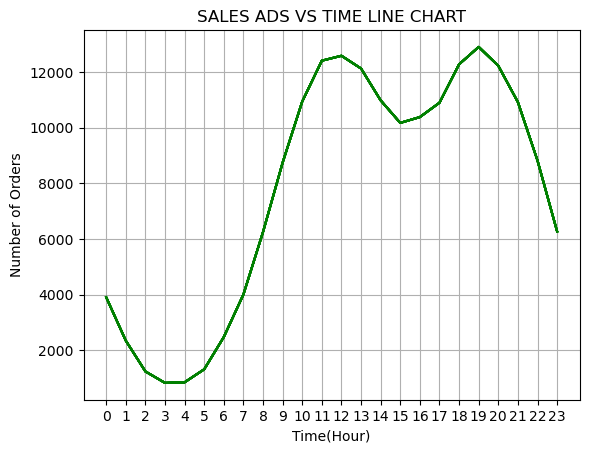

In [298]:
Hours=[hour for hour, df in all_data.groupby("Hour")]
plt.plot(Hours, all_data.groupby('Hour').count(), color="g")
plt.xticks(Hours)
plt.title("SALES ADS VS TIME LINE CHART")
plt.ylabel("Number of Orders")
plt.xlabel("Time(Hour)")
plt.grid()
plt.show()

# The Recommended Time is 1100-1200hrs and 1800-1900hrs

#### Q4: What Products are most often sold together?

In [369]:
all_data.head()
df=all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"]=df.groupby("Order ID")['Product'].transform(lambda x: ",".join(x))
df=df[["Order ID","Grouped"]].drop_duplicates()
df.head(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_1836\2699420054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby("Order ID")['Product'].transform(lambda x: ",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [385]:
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

#'iPhone', 'Lightning Charging Cable' were sold the most in pairs

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q5: What product was sold the most? Why do you think it sold the most?

In [390]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [450]:
product_group=all_data.groupby("Product")
quantity_ordered=product_group.sum("Quantity Ordered")["Quantity Ordered"]
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

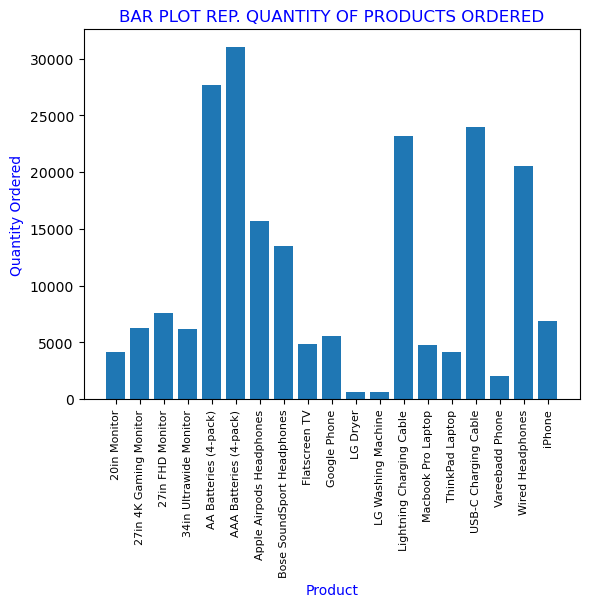

In [462]:
products=[product for product, df in product_group]
plt.bar(products, quantity_ordered)
       
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel("Quantity Ordered", color="b")
plt.xlabel("Product", color="b")
plt.title("BAR PLOT REP. QUANTITY OF PRODUCTS ORDERED", color="b")
plt.show()

# AAA Batteries (4-pack) was sold the most with 31017 orders probably because the product is cheaper compared to all the others?

C:\Users\admin\AppData\Local\Temp\ipykernel_1836\2286357724.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation="vertical", size=8)


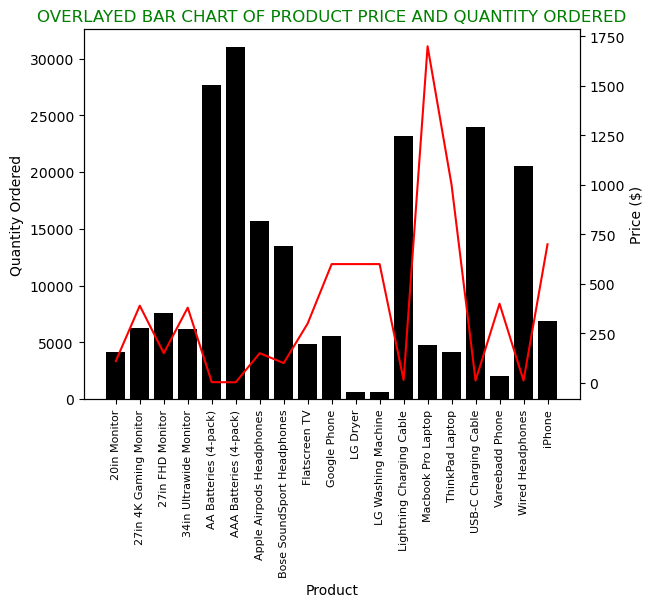

In [528]:
all_data.head()
prices=all_data.groupby('Product').mean("Price Each")['Price Each']

fig, ax1=plt.subplots()
ax2=ax1.twinx()

ax1.bar(products, quantity_ordered, color="k")
ax2.plot(products, prices, color="r")
ax1.set_ylabel("Quantity Ordered", color="k")
ax1.set_xlabel('Product', color="k")
ax2.set_ylabel('Price ($)', color="k")
plt.title("OVERLAYED BAR CHART OF PRODUCT PRICE AND QUANTITY ORDERED", color="g")
ax1.set_xticklabels(products, rotation="vertical", size=8)
plt.show()

# AAA Batteries (4-pack) was sold the most with 31017 orders certainly because the product is cheaper compared to all the others.